In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from common import get_data_path
from tables_utils import Columns, group_by_type

# Import data

In [4]:
data_path = get_data_path('2016_04_16_10k_extended.h5')
table_name = 'DownstreamDebugTuple'
hdf = pd.HDFStore(data_path)
df = hdf.select(table_name)
hdf.close()
columns = Columns(data_path, table_name)

In [5]:
df.head()

,is_true_track,stored_track_charge,stored_track_chi2PerDoF,stored_track_p,stored_track_pt,track_chi2,track_displX,track_displY,track_errXMag,track_errYMag,...,OT3U,OT3V,OT3X1,OT3X2,TTaU,TTaX,TTbV,TTbX,TT_hits,seed_hits
0,False,-1.0,0.0,2813.418882,224.920986,4.813538,-22.356223,89.733734,16.057639,34.542863,...,2,2,2,2,1,1,1,1,4,12
1,True,1.0,0.0,2860.774829,104.954152,0.641020,10.119161,-5.022615,14.293209,29.129699,...,2,2,2,2,1,1,1,1,4,12
2,True,-1.0,0.0,4708.773697,598.412044,0.444495,4.222189,0.077200,8.363078,13.041752,...,2,2,2,2,1,1,1,1,4,12
3,False,-1.0,0.0,2272.888309,110.372386,1.878962,-5.948619,49.530041,19.860208,46.868273,...,2,2,2,2,1,1,1,1,4,12
4,True,1.0,0.0,3066.207537,425.192025,0.556747,13.956091,-1.886976,13.388854,26.446259,...,2,1,2,2,1,1,1,1,4,12


## Group by type

In [6]:
group_by_type(df)

In [7]:
total = df.groupby('type').size()
frac = total / len(df)

# Count

In [8]:
count = pd.DataFrame({'total': total, 'frac': frac})
count

,frac,total
type,,
GT/GS,0.026448,9955
GT/TS,0.268885,101210
TT/TS,0.704667,265241


<IPython.core.display.Javascript object>


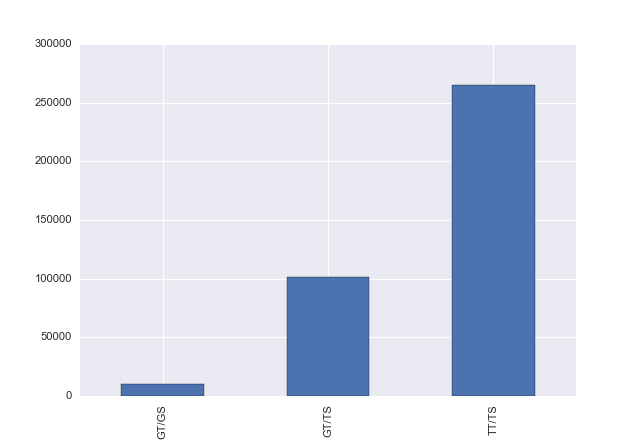

In [9]:
count['total'].plot.bar()

## Categories

In [10]:
true_track_sum = len(df[df['is_true_track'] == True])
ghost_track_sum = len(df[df['is_true_track'] == False])
true_track_sum, ghost_track_sum

(265241, 111165)

In [11]:
count['total'] / true_track_sum

type
GT/GS    0.037532
GT/TS    0.381578
TT/TS    1.000000
Name: total, dtype: float64

In [12]:
count['total'] / ghost_track_sum

type
GT/GS    0.089552
GT/TS    0.910448
TT/TS    2.386012
Name: total, dtype: float64

In [13]:
count['total'] / (true_track_sum + ghost_track_sum)

type
GT/GS    0.026448
GT/TS    0.268885
TT/TS    0.704667
Name: total, dtype: float64

## Number of hits in seed

<IPython.core.display.Javascript object>


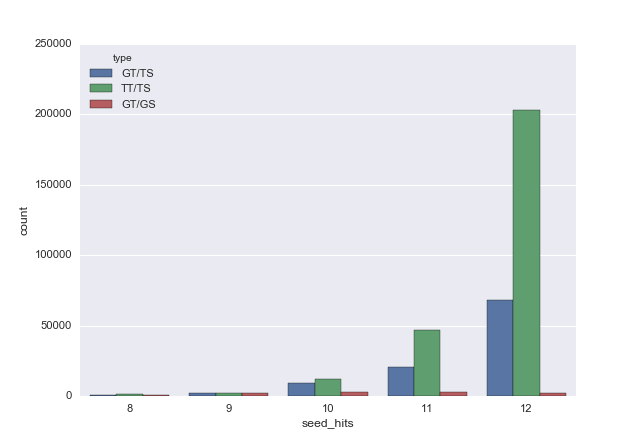

In [14]:
plt.figure()
ax = sns.countplot(hue='type', x='seed_hits', data=df)

In [15]:
g = df.groupby(['type', 'seed_hits']).size().unstack('type')
g

type,GT/GS,GT/TS,TT/TS
seed_hits,,,
8,539,1016,1251
9,1998,2415,1970
10,2931,9290,12159
11,2620,20390,46776
12,1867,68099,203085


In [16]:
def normalize(row):
    return row / sum(row)

f = g.apply(normalize, axis=1)
f

type,GT/GS,GT/TS,TT/TS
seed_hits,,,
8,0.192088,0.362081,0.445830
9,0.313019,0.378349,0.308632
10,0.120221,0.381050,0.498728
11,0.037543,0.292179,0.670278
12,0.006838,0.249400,0.743762


<IPython.core.display.Javascript object>


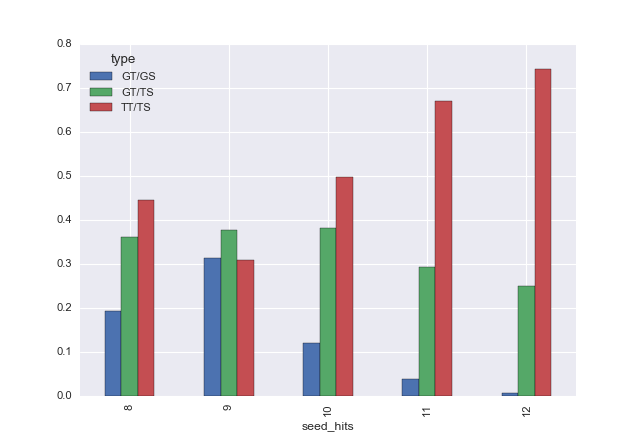

In [17]:
f.plot.bar()